## Deep learning team project

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import cv2
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Model,Sequential, Input, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, AveragePooling2D, GlobalAveragePooling2D, Activation, Dropout, Dense
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.applications import DenseNet121

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [3]:
# gdrive에 mount
from google.colab import drive
drive.mount('/content/gdrive')
# 경로 설정
import os
os.chdir('/content/gdrive/My Drive/Plant_leaf')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
os.getcwd()

'/content/gdrive/My Drive/Plant_leaf'

In [5]:
# 이미지 크기 지정하기
image_w = 64
image_h = 64

# 데이터 열기 
X_orig= np.load("../전처리 후/no_repeat.npy")
Y_orig= np.load("../전처리 후/no_repeat_y.npy")
print('X_train shape:', X_orig.shape)

X_train shape: (40000, 64, 64, 3)


In [0]:
X_orig=X_orig/255.

In [6]:
X_orig[0]

array([[[0.81568627, 0.70980392, 0.65490196],
        [0.8       , 0.69411765, 0.63921569],
        [0.8       , 0.69411765, 0.63921569],
        ...,
        [0.72941176, 0.63921569, 0.63137255],
        [0.7372549 , 0.64705882, 0.63921569],
        [0.73333333, 0.64313725, 0.63529412]],

       [[0.80392157, 0.69803922, 0.64313725],
        [0.81176471, 0.70588235, 0.65098039],
        [0.81176471, 0.70588235, 0.65098039],
        ...,
        [0.7372549 , 0.64705882, 0.63921569],
        [0.71764706, 0.62745098, 0.61960784],
        [0.71372549, 0.62352941, 0.61568627]],

       [[0.81176471, 0.70588235, 0.65098039],
        [0.81176471, 0.70588235, 0.65098039],
        [0.80784314, 0.70196078, 0.64705882],
        ...,
        [0.72156863, 0.62745098, 0.61960784],
        [0.72941176, 0.63529412, 0.62745098],
        [0.7254902 , 0.63529412, 0.62745098]],

       ...,

       [[0.54901961, 0.45098039, 0.43137255],
        [0.58039216, 0.4627451 , 0.43921569],
        [0.55686275, 0

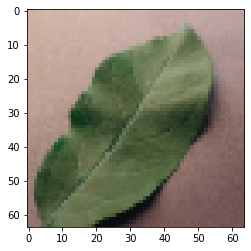

In [7]:
# Image show
import matplotlib.pyplot as plt

#plt.rcParams['figure.figsize'] = (10, 10) # set figure size
plt.imshow(X_orig[0])
plt.show()

In [0]:
# 데이터 나누기
X_train, X_test, y_train, y_test = train_test_split(X_orig, Y_orig, test_size=0.2, random_state=42, stratify=Y_orig)

In [0]:
del(X_orig, Y_orig)

In [10]:
X_train[0]

array([[[0.57647059, 0.56078431, 0.60392157],
        [0.54901961, 0.53333333, 0.57647059],
        [0.54901961, 0.53333333, 0.57647059],
        ...,
        [0.44705882, 0.43137255, 0.47843137],
        [0.47843137, 0.4627451 , 0.50588235],
        [0.45098039, 0.43529412, 0.47843137]],

       [[0.56078431, 0.54509804, 0.58823529],
        [0.55686275, 0.54117647, 0.58431373],
        [0.52156863, 0.50588235, 0.54901961],
        ...,
        [0.45882353, 0.44313725, 0.48627451],
        [0.47843137, 0.4627451 , 0.50588235],
        [0.4745098 , 0.45882353, 0.50196078]],

       [[0.55686275, 0.54117647, 0.58823529],
        [0.58431373, 0.56862745, 0.61176471],
        [0.55686275, 0.54117647, 0.58431373],
        ...,
        [0.46666667, 0.45098039, 0.49411765],
        [0.47058824, 0.45490196, 0.49803922],
        [0.44313725, 0.42745098, 0.47058824]],

       ...,

       [[0.55294118, 0.54509804, 0.56862745],
        [0.57647059, 0.56862745, 0.59215686],
        [0.58431373, 0

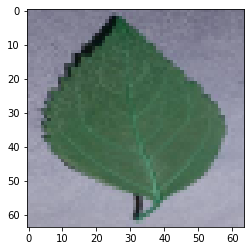

In [11]:
plt.imshow(X_train[1])
plt.show()

* 모델 1

In [0]:
# 모델 구조 정의 
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=X_train.shape[1:], padding='same', activation= 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation= 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding = 'same', activation= 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 전결합층
model.add(Flatten())    # 벡터형태로 reshape
model.add(Dense(512))   # 출력
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(33))
model.add(Activation('softmax'))

# 모델 구축하기
model.compile(loss='categorical_crossentropy',   # 최적화 함수 지정
    optimizer='rmsprop',
    metrics=['accuracy'])

In [38]:
baseline_1= model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))

Train on 32000 samples, validate on 8000 samples
Epoch 1/20
32000/32000 [==============================] - 8s 248us/step - loss: 1.8892 - accuracy: 0.4634 - val_loss: 0.9686 - val_accuracy: 0.7028
Epoch 2/20
32000/32000 [==============================] - 6s 199us/step - loss: 0.9423 - accuracy: 0.7085 - val_loss: 0.7280 - val_accuracy: 0.7709
Epoch 3/20
32000/32000 [==============================] - 6s 199us/step - loss: 0.6627 - accuracy: 0.7916 - val_loss: 0.3973 - val_accuracy: 0.8739
Epoch 4/20
32000/32000 [==============================] - 6s 197us/step - loss: 0.5251 - accuracy: 0.8323 - val_loss: 0.3369 - val_accuracy: 0.8888
Epoch 5/20
32000/32000 [==============================] - 6s 199us/step - loss: 0.4422 - accuracy: 0.8576 - val_loss: 0.2873 - val_accuracy: 0.9085
Epoch 6/20
32000/32000 [==============================] - 8s 242us/step - loss: 0.3811 - accuracy: 0.8784 - val_loss: 0.2397 - val_accuracy: 0.9252
Epoch 7/20
32000/32000 [==============================] - 8s 24

In [0]:
# 모델 구조 정의 
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=X_train.shape[1:], padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))

model.add(Conv2D(128, (3, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

# 전결합층
model.add(Flatten())    # 벡터형태로 reshape
model.add(Dense(512))   # 출력
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(33))
model.add(Activation('softmax'))

# 모델 구축하기
model.compile(loss='categorical_crossentropy',   # 최적화 함수 지정
    optimizer='rmsprop',
    metrics=['accuracy'])

In [27]:
baseline_2= model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))

Train on 32000 samples, validate on 8000 samples
Epoch 1/20
32000/32000 [==============================] - 11s 347us/step - loss: 1.8715 - accuracy: 0.4872 - val_loss: 1.2157 - val_accuracy: 0.6072
Epoch 2/20
32000/32000 [==============================] - 11s 340us/step - loss: 0.8337 - accuracy: 0.7397 - val_loss: 0.5921 - val_accuracy: 0.8061
Epoch 3/20
32000/32000 [==============================] - 11s 339us/step - loss: 0.6264 - accuracy: 0.8022 - val_loss: 0.5485 - val_accuracy: 0.8189
Epoch 4/20
32000/32000 [==============================] - 11s 340us/step - loss: 0.5145 - accuracy: 0.8370 - val_loss: 0.3889 - val_accuracy: 0.8752
Epoch 5/20
32000/32000 [==============================] - 11s 357us/step - loss: 0.4379 - accuracy: 0.8630 - val_loss: 0.4557 - val_accuracy: 0.8618
Epoch 6/20
32000/32000 [==============================] - 11s 356us/step - loss: 0.3981 - accuracy: 0.8776 - val_loss: 0.3963 - val_accuracy: 0.8870
Epoch 7/20
32000/32000 [==============================] -

* 모델을 좀 키워봤더니 정확도도 낮고, 점점 오버피팅되네
* 학습 속도는 한에폭당 2초정도 더걸림
* baseline 1이던 2던 둘다 에폭을 늘리는건 의미가 없어보인다..

In [41]:
X_train.shape

(32000, 64, 64, 3)

baseline_3, 4는 레이어를 4개로 늘려봄

* 레이어 3개까지는 비슷했는데 4개로 늘리니까 좀 성능도 낮고 오버피팅됨

In [36]:
baseline_3= model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))

Train on 32000 samples, validate on 8000 samples
Epoch 1/20
32000/32000 [==============================] - 8s 254us/step - loss: 2.5787 - accuracy: 0.2833 - val_loss: 1.8241 - val_accuracy: 0.4611
Epoch 2/20
32000/32000 [==============================] - 8s 249us/step - loss: 1.4808 - accuracy: 0.5504 - val_loss: 1.1438 - val_accuracy: 0.6852
Epoch 3/20
32000/32000 [==============================] - 8s 248us/step - loss: 1.0819 - accuracy: 0.6646 - val_loss: 0.7317 - val_accuracy: 0.7719
Epoch 4/20
32000/32000 [==============================] - 8s 245us/step - loss: 0.8891 - accuracy: 0.7226 - val_loss: 0.6756 - val_accuracy: 0.7959
Epoch 5/20
32000/32000 [==============================] - 8s 246us/step - loss: 0.7668 - accuracy: 0.7572 - val_loss: 0.5879 - val_accuracy: 0.8145
Epoch 6/20
32000/32000 [==============================] - 8s 246us/step - loss: 0.6848 - accuracy: 0.7834 - val_loss: 0.5131 - val_accuracy: 0.8313
Epoch 7/20
32000/32000 [==============================] - 8s 24

In [0]:
# baseline_4 : 3이랑 똑같은데 dropout(0.25) 두개를 지워봄
# 모델 구조 정의 
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=X_train.shape[1:], padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64, (3, 3), padding = 'same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(128, (3, 3), padding = 'same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3), padding = 'same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 전결합층
model.add(Flatten())    # 벡터형태로 reshape
model.add(Dense(512))   # 출력
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(33))
model.add(Activation('softmax'))

# 모델 구축하기
model.compile(loss='categorical_crossentropy',   # 최적화 함수 지정
    optimizer='rmsprop',
    metrics=['accuracy'])

In [40]:
baseline_4= model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test)) #baseline 3에서 두개의 층에서 Dropout)0.25)을 없애봄

Train on 32000 samples, validate on 8000 samples
Epoch 1/20
32000/32000 [==============================] - 8s 255us/step - loss: 2.5306 - accuracy: 0.2931 - val_loss: 1.4436 - val_accuracy: 0.5726
Epoch 2/20
32000/32000 [==============================] - 8s 243us/step - loss: 1.3651 - accuracy: 0.5805 - val_loss: 0.8671 - val_accuracy: 0.7331
Epoch 3/20
32000/32000 [==============================] - 8s 247us/step - loss: 0.9774 - accuracy: 0.6919 - val_loss: 0.6564 - val_accuracy: 0.7828
Epoch 4/20
32000/32000 [==============================] - 8s 246us/step - loss: 0.7911 - accuracy: 0.7497 - val_loss: 0.5529 - val_accuracy: 0.8189
Epoch 5/20
32000/32000 [==============================] - 8s 244us/step - loss: 0.6725 - accuracy: 0.7835 - val_loss: 0.4407 - val_accuracy: 0.8520
Epoch 6/20
32000/32000 [==============================] - 8s 244us/step - loss: 0.5967 - accuracy: 0.8086 - val_loss: 0.5303 - val_accuracy: 0.8311
Epoch 7/20
32000/32000 [==============================] - 8s 24

baseline 3이랑 4는 별차이 없네

In [0]:
#모델 저장
name='plant_0607_20epoch.h5'
model.save(name)

In [23]:
# 모델 불러오기
import keras
new_model = keras.models.load_model(name)
new_model.summary()

loss,acc = new_model.evaluate(X_test,y_test, verbose=2)  #verbose는 one line per epoch
print("복원된 모델의 정확도: {:5.2f}%".format(100*acc))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 30, 30, 64)       

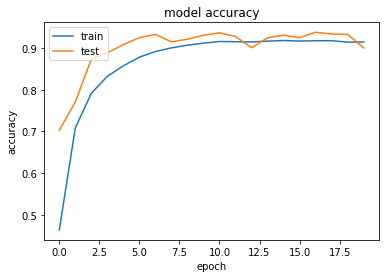

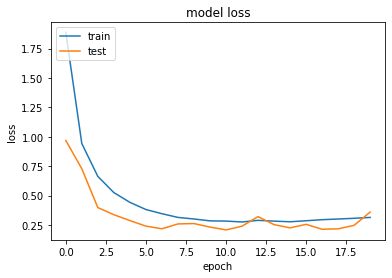

In [42]:
# accuracy plot 
plt.plot(baseline_1.history['accuracy'])
plt.plot(baseline_1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# loss plot
plt.plot(baseline_1.history['loss'])
plt.plot(baseline_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
#모델 저장 또 다른 방법 ???
from tensorflow.keras.callbacks import ModelCheckpoint

filepath = '/content/gdrive/My Drive/전처리 후/model.plant.{epoch:02d}.hdf5'
modelckpt = ModelCheckpoint(filepath=filepath)

* 의문사항: 그리드서치 같은건... 데이터를 인풋으로 안넣는데 어떻게 찾는거지????
* 레이어 수랑 그 안의 필터 갯수를 정하는 기준이 궁금함... 진짜 찐으로 랜덤으로 때려박는건가....
* y 라벨 클라스(?) 같은거 카운트하는 방법 없나.....
* 램 용량이 갑자기 2GB로 줄고.. 학습이 빨라졌는데 이유가 뭐지 ;; 불안함.. 정확도도 높아짐;;;; 무슨일.. (0607)


In [0]:
# 학습 완료된 모델 저장
hdf5_file = "../0605plant_model.hdf5"
if os.path.exists(hdf5_file):
    # 기존에 학습된 모델 불러들이기
    model.load_weights(hdf5_file)
else:
    # 학습한 모델이 없으면 파일로 저장
    model.fit(X_train, y_train, batch_size=32, nb_epoch=10)
    model.save_weights(hdf5_file)